In [15]:
# YOLOv5 Training on Google Colab (Full Script + Steps)

# STEP 1: Setup YOLOv5 and dependencies
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!pip install -r requirements.txt  # install dependencies


Cloning into 'yolov5'...
remote: Enumerating objects: 17478, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 17478 (delta 80), reused 37 (delta 32), pack-reused 17358 (from 2)
Receiving objects: 100% (17478/17478), 16.31 MiB | 25.30 MiB/s, done.
Resolving deltas: 100% (11980/11980), done.
/content/yolov5/yolov5


In [37]:
# STEP 2: Mount Google Drive to access dataset and save results
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/yolo_dataset.zip'
extract_to = '/content/drive/MyDrive/yolo_dataset'

# Unzip only if not already unzipped
if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
else:
    print("Already unzipped.")



In [4]:

DATASET_PATH = '/content/drive/MyDrive/yolo_dataset/yolo_dataset/dataset'  # should contain images/, labels/, data.yaml

In [ ]:
# STEP 4: Train the model (adjust --data and --weights paths as needed)
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 60 \
  --data {DATASET_PATH + '/data.yaml'} \
  --weights yolov5s.pt \
  --project /content/drive/MyDrive/yolo_results \
  --name yolov5_colab \
  --exist-ok \
  --device 0

Streaming output truncated to the last 5000 lines.
      35/59      4.47G    0.02328    0.01651   0.004941         56        640:  60% 378/625 [03:26<01:56,  2.13it/s]/content/yolov5/train.py:413: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      35/59      4.47G     0.0233     0.0165   0.004931         49        640:  61% 379/625 [03:27<02:12,  1.86it/s]/content/yolov5/train.py:413: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      35/59      4.47G    0.02331    0.01649   0.004927         43        640:  61% 380/625 [03:27<01:49,  2.24it/s]/content/yolov5/train.py:413: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      35/59      4.47G    0.023

In [13]:
%matplotlib inline

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-5-11 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detections:
           name  confidence         xmin      ymin         xmax        ymax
0     Capsicum    0.436069     6.267020  0.000000   352.372223  189.407715
1     Cucumber    0.193741  1111.797852  0.000000  1461.519409  156.000137
2     Cucumber    0.167529  1476.581665  0.000000  1735.438110  200.000000
3       Ginger    0.142237   370.556885  0.000000   705.314575  174.566437
4  Cauliflower    0.071377  1118.019897  1.654108  1460.884277  150.479156
5       Ginger    0.063886   347.377106  0.000000  1025.405884  187.104050


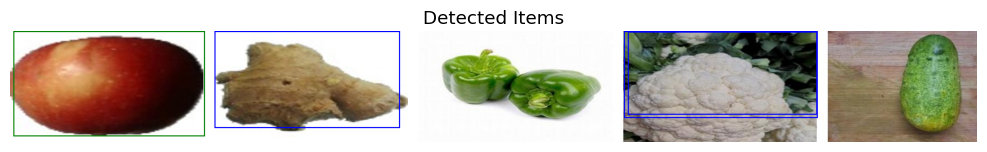

In [23]:
%matplotlib inline

import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Load YOLOv5 model with lower confidence threshold
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolo_results/yolov5_colab/weights/best.pt', force_reload=True)
model.conf = 0.055  # Lower threshold to see all detections

# Nutrition info dictionary with lowercase keys
nutrition_info = {
    'avocado': {'Calories': 160, 'Fiber': 6.7, 'Vitamin C': 10},
    'brocolli': {'Calories': 34, 'Fiber': 2.6, 'Vitamin C': 89.2},
    'cabbage': {'Calories': 25, 'Fiber': 2.5, 'Vitamin C': 36.6},
    'cantaloupe': {'Calories': 34, 'Fiber': 0.9, 'Vitamin C': 36.7},
    'capsicum': {'Calories': 20, 'Fiber': 1.7, 'Vitamin C': 80.4},
    'cauliflower': {'Calories': 25, 'Fiber': 2.0, 'Vitamin C': 48.2},
    'cucumber': {'Calories': 16, 'Fiber': 0.5, 'Vitamin C': 2.8},
    'dates': {'Calories': 282, 'Fiber': 8.0, 'Vitamin C': 0.4},
    'fig': {'Calories': 74, 'Fiber': 2.9, 'Vitamin C': 2.0},
    'ginger': {'Calories': 80, 'Fiber': 2.0, 'Vitamin C': 5.0},
    'lemon': {'Calories': 29, 'Fiber': 2.8, 'Vitamin C': 53.0},
    'lychee': {'Calories': 66, 'Fiber': 1.3, 'Vitamin C': 71.5},
    'peach': {'Calories': 39, 'Fiber': 1.5, 'Vitamin C': 6.6},
    'pear': {'Calories': 57, 'Fiber': 3.1, 'Vitamin C': 4.3},
    'potato': {'Calories': 77, 'Fiber': 2.2, 'Vitamin C': 19.7},
    'tomato': {'Calories': 18, 'Fiber': 1.2, 'Vitamin C': 13.7},
    'apple': {'Calories': 52, 'Fiber': 2.4, 'Vitamin C': 4.6},
    'banana': {'Calories': 89, 'Fiber': 2.6, 'Vitamin C': 8.7},
    'blackberry': {'Calories': 43, 'Fiber': 5.3, 'Vitamin C': 21.0},
    'orange': {'Calories': 47, 'Fiber': 2.4, 'Vitamin C': 53.2}
}

# Load and preprocess the image
image_path = '/content/drive/MyDrive/abc.jpg'
image = Image.open(image_path).convert('RGB')
original_image = image.copy()
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
detected_items = {}

# Run YOLOv5 model
results = model(image)
detections = results.pandas().xyxy[0]
print("Detections:\n", detections[['name', 'confidence', 'xmin', 'ymin', 'xmax', 'ymax']])

label_seen = {}

for _, row in detections.sort_values('confidence', ascending=False).iterrows():
    label_raw = row['name']
    label = label_raw.lower().strip()
    if label.endswith('s') and label[:-1] in nutrition_info:
        label = label[:-1]

    conf = float(row['confidence'])
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])

    # Skip if label already drawn
    if label in label_seen:
        continue

    color = 'green' if conf >= 0.2 else 'blue'
    draw.rectangle([xmin, ymin, xmax, ymax], outline=color, width=2)
    draw.text((xmin, ymin - 10), f"{label_raw} ({conf:.2f})", fill=color, font=font)

    if conf >= 0.2:
        detected_items[label] = nutrition_info.get(label, {})

    label_seen[label] = True

# Show annotated image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Detected Items")
plt.tight_layout()
plt.show()




Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-5-11 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detections:
           name  confidence        xmin        ymin        xmax        ymax
0     Capsicum    0.695615  190.201050  252.951492  456.428619  624.114563
1     Capsicum    0.643298  476.389069  200.110565  681.179077  419.378815
2  Cauliflower    0.400134  524.559326  447.061920  882.359497  801.798523
3     Cucumber    0.318780  166.251541  543.772339  637.484863  897.378235


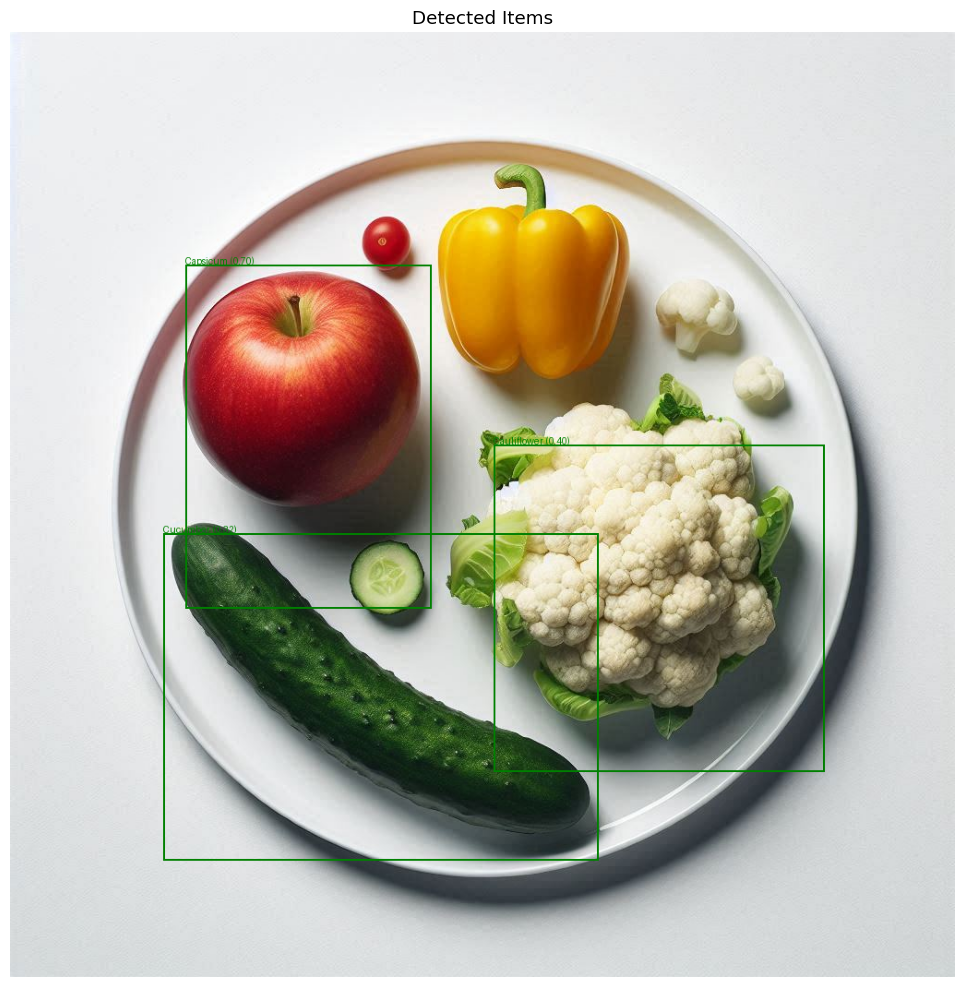

In [26]:
%matplotlib inline

import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Load YOLOv5 model with lower confidence threshold
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolo_results/yolov5_colab/weights/best.pt', force_reload=True)
model.conf = 0.055  # Lower threshold to see all detections

# Nutrition info dictionary with lowercase keys
nutrition_info = {
    'avocado': {'Calories': 160, 'Fiber': 6.7, 'Vitamin C': 10},
    'brocolli': {'Calories': 34, 'Fiber': 2.6, 'Vitamin C': 89.2},
    'cabbage': {'Calories': 25, 'Fiber': 2.5, 'Vitamin C': 36.6},
    'cantaloupe': {'Calories': 34, 'Fiber': 0.9, 'Vitamin C': 36.7},
    'capsicum': {'Calories': 20, 'Fiber': 1.7, 'Vitamin C': 80.4},
    'cauliflower': {'Calories': 25, 'Fiber': 2.0, 'Vitamin C': 48.2},
    'cucumber': {'Calories': 16, 'Fiber': 0.5, 'Vitamin C': 2.8},
    'dates': {'Calories': 282, 'Fiber': 8.0, 'Vitamin C': 0.4},
    'fig': {'Calories': 74, 'Fiber': 2.9, 'Vitamin C': 2.0},
    'ginger': {'Calories': 80, 'Fiber': 2.0, 'Vitamin C': 5.0},
    'lemon': {'Calories': 29, 'Fiber': 2.8, 'Vitamin C': 53.0},
    'lychee': {'Calories': 66, 'Fiber': 1.3, 'Vitamin C': 71.5},
    'peach': {'Calories': 39, 'Fiber': 1.5, 'Vitamin C': 6.6},
    'pear': {'Calories': 57, 'Fiber': 3.1, 'Vitamin C': 4.3},
    'potato': {'Calories': 77, 'Fiber': 2.2, 'Vitamin C': 19.7},
    'tomato': {'Calories': 18, 'Fiber': 1.2, 'Vitamin C': 13.7},
    'apple': {'Calories': 52, 'Fiber': 2.4, 'Vitamin C': 4.6},
    'banana': {'Calories': 89, 'Fiber': 2.6, 'Vitamin C': 8.7},
    'blackberry': {'Calories': 43, 'Fiber': 5.3, 'Vitamin C': 21.0},
    'orange': {'Calories': 47, 'Fiber': 2.4, 'Vitamin C': 53.2}
}

# Load and preprocess the image
image_path = '/content/drive/MyDrive/chalo.jpeg'
image = Image.open(image_path).convert('RGB')
original_image = image.copy()
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
detected_items = {}

# Run YOLOv5 model
results = model(image)
detections = results.pandas().xyxy[0]
print("Detections:\n", detections[['name', 'confidence', 'xmin', 'ymin', 'xmax', 'ymax']])

label_seen = {}

for _, row in detections.sort_values('confidence', ascending=False).iterrows():
    label_raw = row['name']
    label = label_raw.lower().strip()
    if label.endswith('s') and label[:-1] in nutrition_info:
        label = label[:-1]

    conf = float(row['confidence'])
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])

    # Skip if label already drawn
    if label in label_seen:
        continue

    color = 'green' if conf >= 0.2 else 'blue'
    draw.rectangle([xmin, ymin, xmax, ymax], outline=color, width=2)
    draw.text((xmin, ymin - 10), f"{label_raw} ({conf:.2f})", fill=color, font=font)

    if conf >= 0.2:
        detected_items[label] = nutrition_info.get(label, {})

    label_seen[label] = True

# Show annotated image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Detected Items")
plt.tight_layout()
plt.show()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-5-11 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detections:
        name  confidence        xmin        ymin        xmax        ymax
0  Capsicum    0.769981  621.933899  138.431427  947.370789  630.225952
1  Capsicum    0.562534   29.004200  197.384705  620.459473  579.926636
2   Avocado    0.273733  614.621643  145.883087  954.206543  630.258606
3  Capsicum    0.231852  353.753967  341.399200  613.835876  589.844910
4  Cucumber    0.158916   38.016979  200.626617  417.243988  566.613708


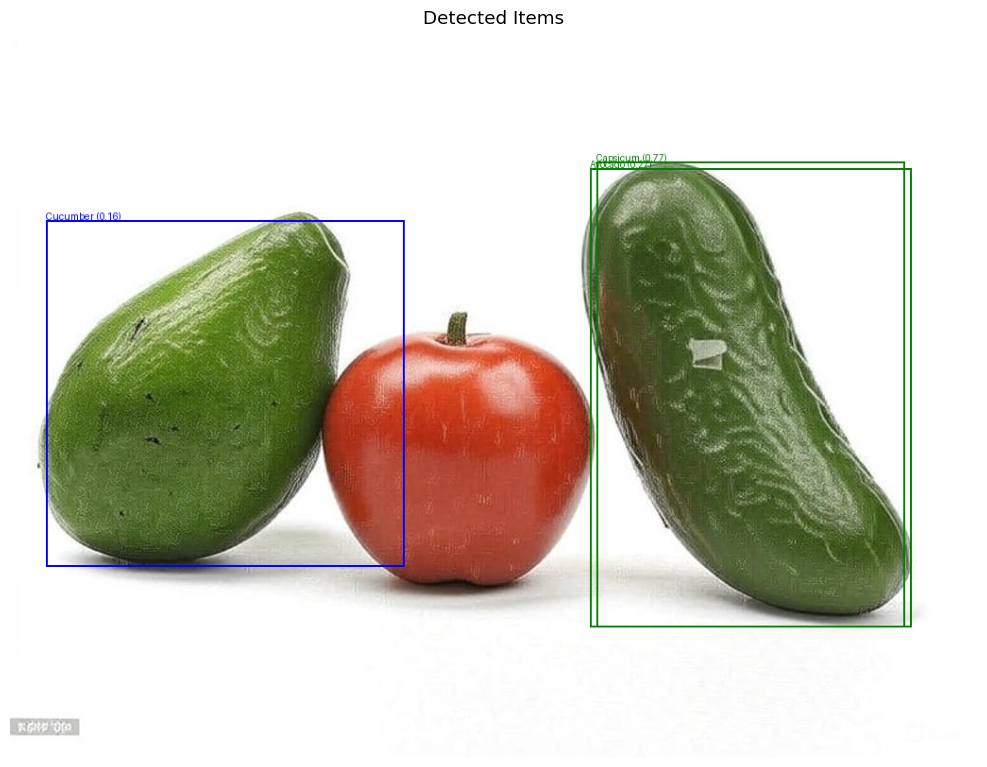

In [39]:
%matplotlib inline

import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Load YOLOv5 model with lower confidence threshold
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolo_results/yolov5_colab/weights/best.pt', force_reload=True)
model.conf = 0.055  # Lower threshold to see all detections

# Nutrition info dictionary with lowercase keys
nutrition_info = {
    'avocado': {'Calories': 160, 'Fiber': 6.7, 'Vitamin C': 10},
    'brocolli': {'Calories': 34, 'Fiber': 2.6, 'Vitamin C': 89.2},
    'cabbage': {'Calories': 25, 'Fiber': 2.5, 'Vitamin C': 36.6},
    'cantaloupe': {'Calories': 34, 'Fiber': 0.9, 'Vitamin C': 36.7},
    'capsicum': {'Calories': 20, 'Fiber': 1.7, 'Vitamin C': 80.4},
    'cauliflower': {'Calories': 25, 'Fiber': 2.0, 'Vitamin C': 48.2},
    'cucumber': {'Calories': 16, 'Fiber': 0.5, 'Vitamin C': 2.8},
    'dates': {'Calories': 282, 'Fiber': 8.0, 'Vitamin C': 0.4},
    'fig': {'Calories': 74, 'Fiber': 2.9, 'Vitamin C': 2.0},
    'ginger': {'Calories': 80, 'Fiber': 2.0, 'Vitamin C': 5.0},
    'lemon': {'Calories': 29, 'Fiber': 2.8, 'Vitamin C': 53.0},
    'lychee': {'Calories': 66, 'Fiber': 1.3, 'Vitamin C': 71.5},
    'peach': {'Calories': 39, 'Fiber': 1.5, 'Vitamin C': 6.6},
    'pear': {'Calories': 57, 'Fiber': 3.1, 'Vitamin C': 4.3},
    'potato': {'Calories': 77, 'Fiber': 2.2, 'Vitamin C': 19.7},
    'tomato': {'Calories': 18, 'Fiber': 1.2, 'Vitamin C': 13.7},
    'apple': {'Calories': 52, 'Fiber': 2.4, 'Vitamin C': 4.6},
    'banana': {'Calories': 89, 'Fiber': 2.6, 'Vitamin C': 8.7},
    'blackberry': {'Calories': 43, 'Fiber': 5.3, 'Vitamin C': 21.0},
    'orange': {'Calories': 47, 'Fiber': 2.4, 'Vitamin C': 53.2}
}

# Load and preprocess the image
image_path = '/content/drive/MyDrive/hello3.jpg'
image = Image.open(image_path).convert('RGB')
original_image = image.copy()
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
detected_items = {}

# Run YOLOv5 model
results = model(image)
detections = results.pandas().xyxy[0]
print("Detections:\n", detections[['name', 'confidence', 'xmin', 'ymin', 'xmax', 'ymax']])

label_seen = {}

for _, row in detections.sort_values('confidence', ascending=False).iterrows():
    label_raw = row['name']
    label = label_raw.lower().strip()
    if label.endswith('s') and label[:-1] in nutrition_info:
        label = label[:-1]

    conf = float(row['confidence'])
    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])

    # Skip if label already drawn
    if label in label_seen:
        continue

    color = 'green' if conf >= 0.2 else 'blue'
    draw.rectangle([xmin, ymin, xmax, ymax], outline=color, width=2)
    draw.text((xmin, ymin - 10), f"{label_raw} ({conf:.2f})", fill=color, font=font)

    if conf >= 0.2:
        detected_items[label] = nutrition_info.get(label, {})

    label_seen[label] = True

# Show annotated image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Detected Items")
plt.tight_layout()
plt.show()